In [ ]:
# question 1: What are the top 10 items?
# question 2: What are the number of items sold by the day, month and hour?
# question 3: How many transaction in weekdays compare to weekends

In [1]:
# Importation of libraries
import pandas as pd
import numpy as np
import io

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Open and Creating the dataset
df_initial = pd.read_csv('BreadBasket_DMS.csv', header = 0)
df_initial.head()

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam


In [8]:
df_initial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB


In [9]:
df_initial.describe()

,Transaction
count,21293.000000
mean,4951.990889
std,2787.758400
min,1.000000
25%,2548.000000
50%,5067.000000
75%,7329.000000
max,9684.000000


In [10]:
df_initial.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'NONE',
       'Tartine', 'Basket', 'Mineral water', 'Farm House', 'Fudge',
       'Juice', "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pi

We can see that there are "NONE" values in Item columns. This will affect our decision since those values are meaningless. That's why we should remove it to make sure our data is cleaned.

In [11]:
# drop all NONE values in column Item
cleaned_df = df_initial.drop(df_initial[df_initial.Item == "NONE"].index)

Check it again to see if None values are removed

In [12]:
# double check to make sure that there are no NONE values in item column
cleaned_df.Item.unique()

array(['Bread', 'Scandinavian', 'Hot chocolate', 'Jam', 'Cookies',
       'Muffin', 'Coffee', 'Pastry', 'Medialuna', 'Tea', 'Tartine',
       'Basket', 'Mineral water', 'Farm House', 'Fudge', 'Juice',
       "Ella's Kitchen Pouches", 'Victorian Sponge', 'Frittata',
       'Hearty & Seasonal', 'Soup', 'Pick and Mix Bowls', 'Smoothies',
       'Cake', 'Mighty Protein', 'Chicken sand', 'Coke',
       'My-5 Fruit Shoot', 'Focaccia', 'Sandwich', 'Alfajores', 'Eggs',
       'Brownie', 'Dulce de Leche', 'Honey', 'The BART', 'Granola',
       'Fairy Doors', 'Empanadas', 'Keeping It Local', 'Art Tray',
       'Bowl Nic Pitt', 'Bread Pudding', 'Adjustment', 'Truffles',
       'Chimichurri Oil', 'Bacon', 'Spread', 'Kids biscuit', 'Siblings',
       'Caramel bites', 'Jammie Dodgers', 'Tiffin', 'Olum & polenta',
       'Polenta', 'The Nomad', 'Hack the stack', 'Bakewell',
       'Lemon and coconut', 'Toast', 'Scone', 'Crepes', 'Vegan mincepie',
       'Bare Popcorn', 'Muesli', 'Crisps', 'Pintxos', 

Combine 2 columns "date" and "time" to timestamp columns for analyst

In [13]:
cleaned_df['Datetime'] = pd.to_datetime(cleaned_df['Date'] + ' ' + cleaned_df['Time'])
cleaned_df = cleaned_df[["Datetime", "Transaction", "Item"]].set_index("Datetime")
cleaned_df.head()

,Transaction,Item
Datetime,,
2016-10-30 09:58:11,1,Bread
2016-10-30 10:05:34,2,Scandinavian
2016-10-30 10:05:34,2,Scandinavian
2016-10-30 10:07:57,3,Hot chocolate
2016-10-30 10:07:57,3,Jam


We will need hour, day of weeks to anaylyst it by time columns.


In [14]:
cleaned_df["Hour"] = cleaned_df.index.hour
cleaned_df["Weekday"] = cleaned_df.index.weekday + 1

cleaned_df.head()

,Transaction,Item,Hour,Weekday
Datetime,,,,
2016-10-30 09:58:11,1,Bread,9,7
2016-10-30 10:05:34,2,Scandinavian,10,7
2016-10-30 10:05:34,2,Scandinavian,10,7
2016-10-30 10:07:57,3,Hot chocolate,10,7
2016-10-30 10:07:57,3,Jam,10,7


Question 1: What are the top 10 items by value?


In [15]:
counts = cleaned_df.Item.value_counts()
top_10_items = pd.DataFrame({'counts': counts})
top_10_items.head(10)

,counts
Coffee,5471
Bread,3325
Tea,1435
Cake,1025
Pastry,856
Sandwich,771
Medialuna,616
Hot chocolate,590
Cookies,540
Brownie,379


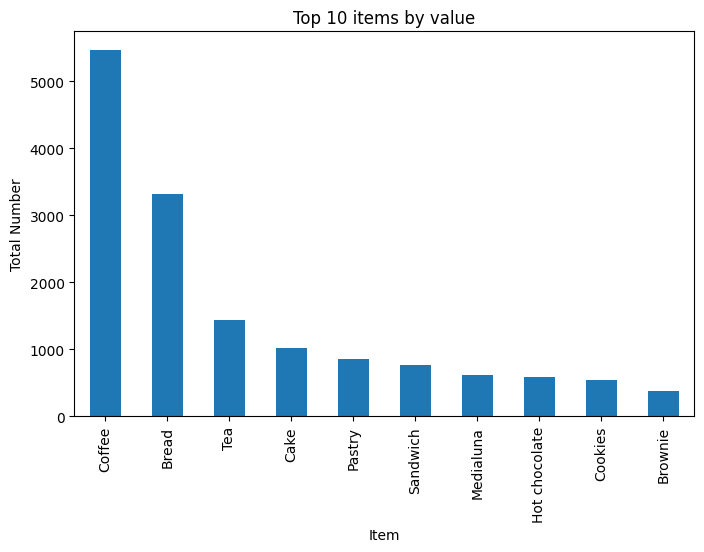

In [16]:
plt.figure(figsize=(8,5))
cleaned_df.Item.value_counts()[:10].plot(kind="bar", title="Top 10 items by value").set(xlabel="Item", ylabel="Total Number")
plt.show()

From this chart, we can see that the top 10 items sold are Coffee, bread, tea, cake, pastry, sandwich, medialuna, hot chocolate, cookies, and brownies. These are very common products in every Market Basket that will have. Our data only have products, if your data have the type of products (for ex, what type of coffee, bread, …) you can have more insight about your products shop.

Question 2: What are the number of items sold by the day, month and hour?

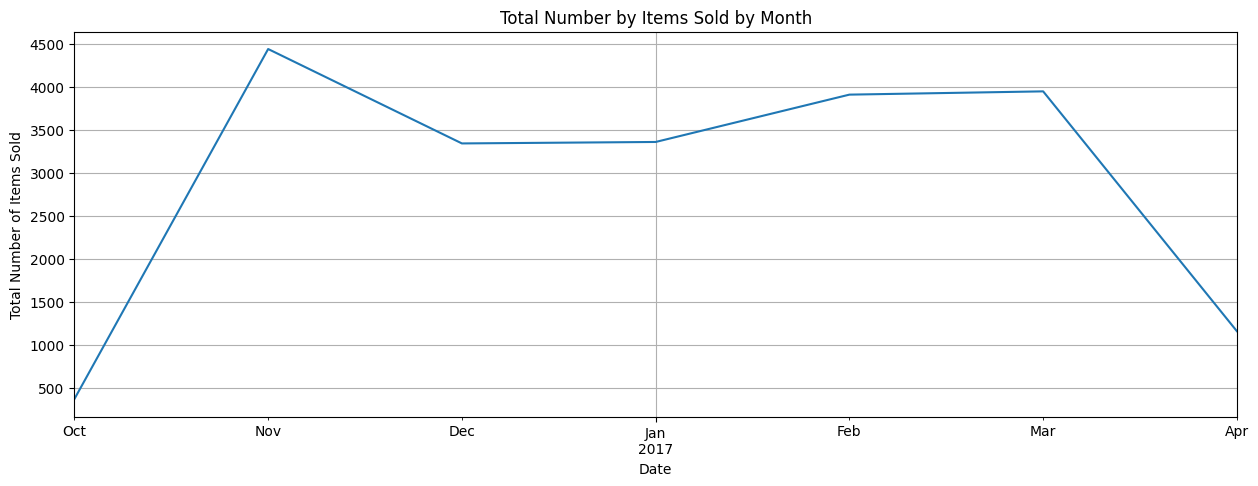

In [17]:
cleaned_df["Item"].resample("M").count().plot(figsize=(15,5), grid=True, title="Total Number by Items Sold by Month").set(xlabel="Date", ylabel="Total Number of Items Sold")
plt.show()

From this chart, we can see that:
*   Our data have time range from 10/2016 - 4/2017
*   11/2016 had the highest number of items sold and 4/2017 had the lowest number of items sold. In Nov, we should consider having more items for selling and we also need to investigate why we had such poor performance in 4/2017.



           Item
Hour           
1      0.006289
7      0.150943
8      4.056604
9     12.364780
10    16.767296
11    19.509434
12    17.949686
13    16.459119
14    16.603774
15    13.301887
16     8.446541
17     2.314465
18     0.515723
19     0.301887
20     0.138365
21     0.018868
22     0.050314
23     0.018868


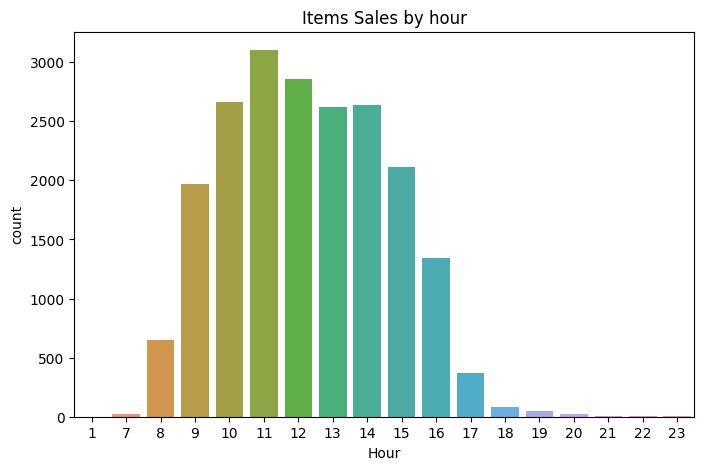

In [ ]:
# Aggregate item sold by hour
total_days = len(np.unique(cleaned_df.index.date))
items_sold_by_hour = cleaned_df.groupby("Hour").agg({"Item": lambda item: item.count()/total_days})
print(items_sold_by_hour)

# Plot items sold by hour
plt.figure(figsize=(8,5))
sns.countplot(x='Hour',data=cleaned_df)
plt.title('Items Sales by hour')
plt.show()

From this chart, we can see that from 10am - 3pm, we have highest orders, we can have a plan to arrange more employees in this time range to reduce number of waiting customers or we can have promotions, sale off to get more customers out of that time range. Right now, we are only doing analyst base on hour but not in weekdays or weekends. Let's see if those attribute are affect our decisions.

In [18]:
import datetime
def count_weekdays(start_year, start_month, start_date, end_year, end_month, end_date):
  '''
  This function will caculate how many weekdays we have in a period of time
  Input: start_year, start_month, start_date, end_year, end_month, end_date
  Output: number of weekday
  '''
  daterange = pd.date_range(datetime.date(start_year, start_month, start_date), datetime.date(end_year, end_month, end_date))

  monday = 0
  tuesday = 0
  wednesday = 0
  thursday = 0
  friday = 0
  saturday = 0
  sunday = 0

  for day in np.unique(cleaned_df.index.date):
      if day.isoweekday() == 1:
          monday += 1
      elif day.isoweekday() == 2:
          tuesday += 1
      elif day.isoweekday() == 3:
          wednesday += 1
      elif day.isoweekday() == 4:
          thursday += 1
      elif day.isoweekday() == 5:
          friday += 1
      elif day.isoweekday() == 6:
          saturday += 1
      elif day.isoweekday() == 7:
          sunday += 1

  all_weekdays = monday + tuesday + wednesday + thursday + friday + saturday + sunday
  print("monday = {0}, tuesday = {1}, wednesday = {2}, thursday = {3}, friday = {4}, saturday = {5}, sunday = {6}, total = {7}".format(monday, tuesday, wednesday, thursday, friday, saturday, sunday, all_weekdays))
  return monday, tuesday, wednesday, thursday, friday, saturday, sunday, all_weekdays


monday = 21, tuesday = 23, wednesday = 23, thursday = 23, friday = 23, saturday = 23, sunday = 23, total = 159


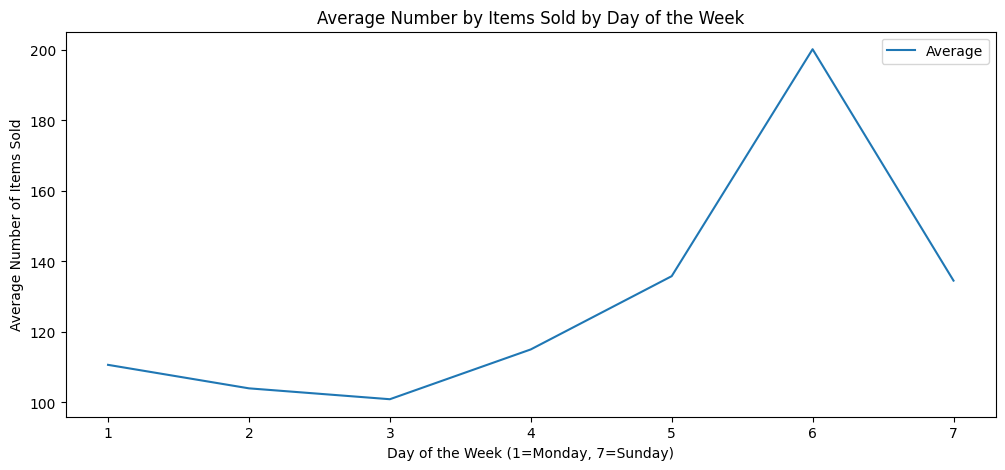

In [19]:
monday, tuesday, wednesday, thursday, friday, saturday, sunday, all_weekdays = count_weekdays(2016,10,30,2017,4,9)
bread_groupby_weekday = cleaned_df.groupby("Weekday").agg({"Item": lambda item: item.count()})
bread_groupby_weekday.head()
conditions = [
    (bread_groupby_weekday.index == 1),
    (bread_groupby_weekday.index == 2),
    (bread_groupby_weekday.index == 3),
    (bread_groupby_weekday.index == 4),
    (bread_groupby_weekday.index == 5),
    (bread_groupby_weekday.index == 6),
    (bread_groupby_weekday.index == 7)]

choices = [bread_groupby_weekday.Item/monday, bread_groupby_weekday.Item/tuesday, bread_groupby_weekday.Item/wednesday, bread_groupby_weekday.Item/thursday, bread_groupby_weekday.Item/friday, bread_groupby_weekday.Item/saturday, bread_groupby_weekday.Item/sunday]

bread_groupby_weekday["Average"] = np.select(conditions, choices, default=0)
bread_groupby_weekday
bread_groupby_weekday.plot(y="Average", figsize=(12,5), title="Average Number by Items Sold by Day of the Week").set(xlabel="Day of the Week (1=Monday, 7=Sunday)", ylabel="Average Number of Items Sold")
plt.show()

Since weekends consistently yield the highest sales, the bakery can optimize production for these days while scaling down the output on other days. Another approach involves cultivating the customer’s perception of ongoing promotions during the weekdays, enticing them to visit the bakery and explore the available offers. This strategic maneuver has the potential to elevate weekday footfall and consequently raise the average sales across these days.